### Loading AirBnb dataset from Srilanka

In [1]:
#importing pandas library
import pandas as pd

#reading the dataset
df_1=pd.read_csv("tomslee_airbnb_sri_lanka_1174_2017-04-28.csv")

#showing first 5 rows of the dataset
df_1.head()



,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,last_modified,latitude,longitude,location
0,14578917,1174,72397041,Shared room,NaN,Sri Lanka,Kandy,K.F.G. & G. Korale,0,NaN,1,1.0,NaN,12.0,NaN,2017-04-28 14:01:47.949839,7.292193,80.631460,0101000020E6100000DC2E34D769285440037B4CA4342B...
1,18342790,1174,39132047,Shared room,NaN,Sri Lanka,Gampaha,Ja-Ela,0,NaN,1,1.0,NaN,10.0,NaN,2017-04-28 14:01:47.955226,7.075855,79.929256,0101000020E6100000276728EE78FB5340CBF3E0EEAC4D...
2,13481138,1174,76678139,Shared room,NaN,Sri Lanka,Matale,Dambulla,0,NaN,2,1.0,NaN,20.0,NaN,2017-04-28 14:01:47.957538,7.881763,80.645547,0101000020E6100000FA415DA450295440994A3FE1EC86...
3,15857437,1174,72397041,Shared room,NaN,Sri Lanka,Kandy,K.F.G. & G. Korale,2,NaN,1,1.0,NaN,10.0,NaN,2017-04-28 14:01:47.960416,7.289705,80.628771,0101000020E6100000166BB8C83D28544062F3716DA828...
4,12002059,1174,64042382,Shared room,NaN,Sri Lanka,Kandy,K.F.G. & G. Korale,1,NaN,1,1.0,NaN,11.0,NaN,2017-04-28 14:01:47.963951,7.290405,80.655338,0101000020E6100000DE74CB0EF12954402861A6ED5F29...


In [2]:
#printing number of columns in the original dataset
print('number of columns in original dataset: ',len(df_1.columns))

number of columns in original dataset:  19


In [3]:
#printing rows and columns of original dataset
df_1.shape

(11568, 19)

**- the dataset has 11568 rows(instances) and 19 columns(attribiutes)**



**- now we will check how many NaN values in each attributes**



**- ['country'] ['bathrooms'] ['minstay'] has only NaN values.**

In [4]:
# dataset info gives us number of values in the each column and also indicates if there is any column of only missing values
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11568 entries, 0 to 11567
Data columns (total 19 columns):
room_id                 11568 non-null int64
survey_id               11568 non-null int64
host_id                 11568 non-null int64
room_type               11568 non-null object
country                 0 non-null float64
city                    11568 non-null object
borough                 11568 non-null object
neighborhood            11568 non-null object
reviews                 11568 non-null int64
overall_satisfaction    2557 non-null float64
accommodates            11568 non-null int64
bedrooms                11568 non-null float64
bathrooms               0 non-null float64
price                   11568 non-null float64
minstay                 0 non-null float64
last_modified           11568 non-null object
latitude                11568 non-null float64
longitude               11568 non-null float64
location                11568 non-null object
dtypes: float64(8), int64(5

In [5]:
# number of missing values in each column. country,bathrooms and minstay columns have only missing values and overall_satisfaction has 9011 missing values
df_1.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 11568
city                        0
borough                     0
neighborhood                0
reviews                     0
overall_satisfaction     9011
accommodates                0
bedrooms                    0
bathrooms               11568
price                       0
minstay                 11568
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

**- there are 9011 NaN values in overall_satisfaction. We can drop all the rows containing those NaN values.**



**- country, bathrooms and minstay columns have only NaN values. So we can ignore/delete those three columns.**





In [6]:
# unique value of city column shows that it has only one value which is Srilanka
df_1['city'].unique()

array(['Sri Lanka'], dtype=object)

In [7]:
## unique value of survey_id column shows that it has only one value which is 1174
df_1['survey_id'].unique()

array([1174], dtype=int64)

**- ['city'] has only one unique value. It is not city actually. It is country name. We can drop this column too.**



**- ['survey_id'] has only one survey_id. So we can drop this column too.**

In [8]:
# cleaning the data with selecting columns that have  no missing values and ignoring some unnecessary columns and dropping rows that have nan values and reseting the index with drop 
df_1=df_1[['room_id',
      'host_id',
      'room_type',
      'borough',
      'neighborhood',
      'reviews',
      'overall_satisfaction',
      'accommodates',
      'bedrooms',
      'last_modified',
      'latitude',
      'longitude', 
      'location',    
      'price']].dropna().reset_index(drop = True)

In [9]:
# after cleaning the dataset first 5 rows
df_1.head(5)

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,last_modified,latitude,longitude,location,price
0,794866,2280409,Private room,Galle,Ambalangoda,5,4.5,9,1.0,2017-04-29 12:27:58.139205,6.230980,80.056247,0101000020E6100000E15F048D99035440CD1E680586EC...,300.0
1,16313193,106602376,Private room,Hambantota,Thissamaharama,3,5.0,3,1.0,2017-04-29 12:27:49.611334,6.267283,81.297854,0101000020E6100000E63E390A10535440691B7FA2B211...,180.0
2,4804124,2515276,Private room,Hambantota,Thissamaharama,3,4.0,10,1.0,2017-04-29 12:27:49.579004,6.265228,81.231154,0101000020E6100000BC95253ACB4E544017EFC7ED970F...,186.0
3,3096002,2280409,Private room,Badulla,Ella,4,3.5,3,1.0,2017-04-29 12:27:47.835733,6.817018,81.081622,0101000020E610000095287B4B394554402BF9D85DA044...,190.0
4,6718419,27260251,Private room,Galle,Hikkaduwa,4,5.0,4,2.0,2017-04-29 12:27:47.810019,6.130373,80.108414,0101000020E61000006D1B4641F00654402920ED7F8085...,190.0


In [10]:
# shape of cleaned dataset. 9 columns dropped and 9011 rows dropped
df_1.shape

(2557, 14)

### Tidy data:


#### The dataset I have chosen, there is nothing much to make it tidy. It can be chuncked into subsets so that those subsets are smaller in size and can be used for particular investigation target.


- The clenaed dataset is divided into two subsets of dataset



- They can be merged later on in case we need the original dataset  



- df_sub1 which has columns room_type, borough(meaning location), neighborhood and price



- df_sub2 which has columns reviews,overall_satisfaction,accommodates,bedrooms and price



- df_sub3 which has columns last_modified,latitude,longitude,location columns



- both subsets has two other columns room_id and host_id which will be used as identifier



- So both subsets has three common columns room_id, host_id and price


In [11]:
# making smaller dataset by selecting some columns from cleaned dataset.
df_sub1=df_1[['room_id','host_id','room_type','borough','neighborhood','price']]



#printing first 5 lines of subset data 
df_sub1.head()

,room_id,host_id,room_type,borough,neighborhood,price
0,794866,2280409,Private room,Galle,Ambalangoda,300.0
1,16313193,106602376,Private room,Hambantota,Thissamaharama,180.0
2,4804124,2515276,Private room,Hambantota,Thissamaharama,186.0
3,3096002,2280409,Private room,Badulla,Ella,190.0
4,6718419,27260251,Private room,Galle,Hikkaduwa,190.0


In [12]:
# number of columns and rows of first subset
df_sub1.shape

(2557, 6)

In [13]:
# total number of rooms in a location
df_1.groupby('borough')['room_id'].count()

borough
Ampara           30
Anuradhapura     56
Badulla         116
Batticaloa       14
Colombo         442
Galle           555
Gampaha         232
Hambantota      103
Jaffna           15
Kalutara         58
Kandy           305
Kegalle          16
Kurunegala        2
Mannar            1
Matale           85
Matara          285
Moneragala       20
Mullaitivu        1
Nuwara Eliya    101
Polonnaruwa      21
Puttalam         29
Ratnapura        19
Trincomalee      51
Name: room_id, dtype: int64

In [14]:
# second subset from original dataset
df_sub2=df_1[['room_id','host_id','reviews','overall_satisfaction','accommodates','bedrooms','price']]

df_sub2.head()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
0,794866,2280409,5,4.5,9,1.0,300.0
1,16313193,106602376,3,5.0,3,1.0,180.0
2,4804124,2515276,3,4.0,10,1.0,186.0
3,3096002,2280409,4,3.5,3,1.0,190.0
4,6718419,27260251,4,5.0,4,2.0,190.0


In [15]:
#plotting price against overall_satisfaction from df_sub2
import matplotlib.pyplot as plt
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

(df_sub2
     .groupby(['overall_satisfaction'])
     ['price']
     .mean()).iplot(title="Price and satisfaction level correlation estimation",xaxis_title='Overall_satisfaction',yaxis_title='Price')




     


In [16]:
# number of columns and rows of second subset
df_sub2.shape

(2557, 7)

In [17]:
#pip install plotly pip install cufflinks

In [18]:
df_sub3=df_1[['room_id','host_id','last_modified','latitude','longitude','location','price']]

df_sub3.head()

,room_id,host_id,last_modified,latitude,longitude,location,price
0,794866,2280409,2017-04-29 12:27:58.139205,6.230980,80.056247,0101000020E6100000E15F048D99035440CD1E680586EC...,300.0
1,16313193,106602376,2017-04-29 12:27:49.611334,6.267283,81.297854,0101000020E6100000E63E390A10535440691B7FA2B211...,180.0
2,4804124,2515276,2017-04-29 12:27:49.579004,6.265228,81.231154,0101000020E6100000BC95253ACB4E544017EFC7ED970F...,186.0
3,3096002,2280409,2017-04-29 12:27:47.835733,6.817018,81.081622,0101000020E610000095287B4B394554402BF9D85DA044...,190.0
4,6718419,27260251,2017-04-29 12:27:47.810019,6.130373,80.108414,0101000020E61000006D1B4641F00654402920ED7F8085...,190.0


In [19]:
#merging both subsets on common three columns(room_id,host_id and price). It retrurns us the original dataset
joined = pd.merge(df_sub1, df_sub2,  on=['room_id','host_id','price'])
joined = pd.merge(joined, df_sub3, on =['room_id','host_id','price'])

joined.head()

,room_id,host_id,room_type,borough,neighborhood,price,reviews,overall_satisfaction,accommodates,bedrooms,last_modified,latitude,longitude,location
0,794866,2280409,Private room,Galle,Ambalangoda,300.0,5,4.5,9,1.0,2017-04-29 12:27:58.139205,6.230980,80.056247,0101000020E6100000E15F048D99035440CD1E680586EC...
1,16313193,106602376,Private room,Hambantota,Thissamaharama,180.0,3,5.0,3,1.0,2017-04-29 12:27:49.611334,6.267283,81.297854,0101000020E6100000E63E390A10535440691B7FA2B211...
2,4804124,2515276,Private room,Hambantota,Thissamaharama,186.0,3,4.0,10,1.0,2017-04-29 12:27:49.579004,6.265228,81.231154,0101000020E6100000BC95253ACB4E544017EFC7ED970F...
3,3096002,2280409,Private room,Badulla,Ella,190.0,4,3.5,3,1.0,2017-04-29 12:27:47.835733,6.817018,81.081622,0101000020E610000095287B4B394554402BF9D85DA044...
4,6718419,27260251,Private room,Galle,Hikkaduwa,190.0,4,5.0,4,2.0,2017-04-29 12:27:47.810019,6.130373,80.108414,0101000020E61000006D1B4641F00654402920ED7F8085...


In [32]:

#'2017-04-29 12:27:58.139205'.split(' ')


['2017-04-29', '12:27:58.139205']

In [20]:




#df_1 = df_1['',]

#df_1['bedrooms'].unique().shape


In [21]:
#df_1['borough'].unique().shape

In [22]:
#df_1['room_id'].unique().shape

In [23]:
#df_1['host_id'].unique().shape

In [24]:
#df_1['overall_satisfaction'].unique()

In [25]:
#print('how many levels of satisfaction level:',len(df_1['overall_satisfaction'].unique()))

In [26]:
#df_1['reviews'].unique()

In [27]:
#df_1['bedrooms'].unique()

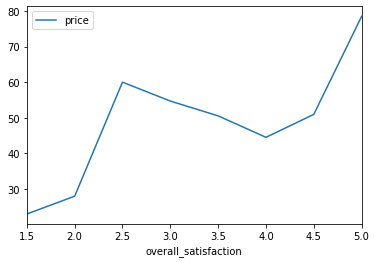

In [28]:
#import matplotlib.pyplot as plt
# probably don't need the magic anymore
#%matplotlib inline

#(df_1
     #.groupby(['overall_satisfaction'])
     #[['price']]
     #.mean()
     #.plot()
#)
#plt.show()

In [29]:
#%matplotlib inline

#(df_sub2
    # .groupby(['overall_satisfaction'])
    # [['price']]
    # .mean()
    # .plot()
#)
#plt.show()